In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')
#clear_output()

In [133]:
data1 = pd.read_csv('full_data.csv')
data2 = pd.read_csv("full_filled_stroke_data (1).csv")
data = pd.concat([data1,data2])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
2,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
3,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
4,Male,81.00,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1


In [134]:
data.shape

(5182, 11)

In [135]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [136]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   521
smoking_status          4
stroke                  2
dtype: int64

In [137]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
avg_glucose_level,5182.000000,106.749620,45.875281,55.120000,77.432500,92.050000,114.340000,271.740000
age,5182.000000,43.754574,22.706994,0.080000,26.000000,45.000000,62.000000,82.000000
bmi,5182.000000,28.530705,6.692112,14.000000,23.900000,28.300000,32.500000,48.900000
hypertension,5182.000000,0.101505,0.302026,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5182.000000,0.059437,0.236463,0.000000,0.000000,0.000000,0.000000,1.000000
stroke,5182.000000,0.055577,0.229125,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:>

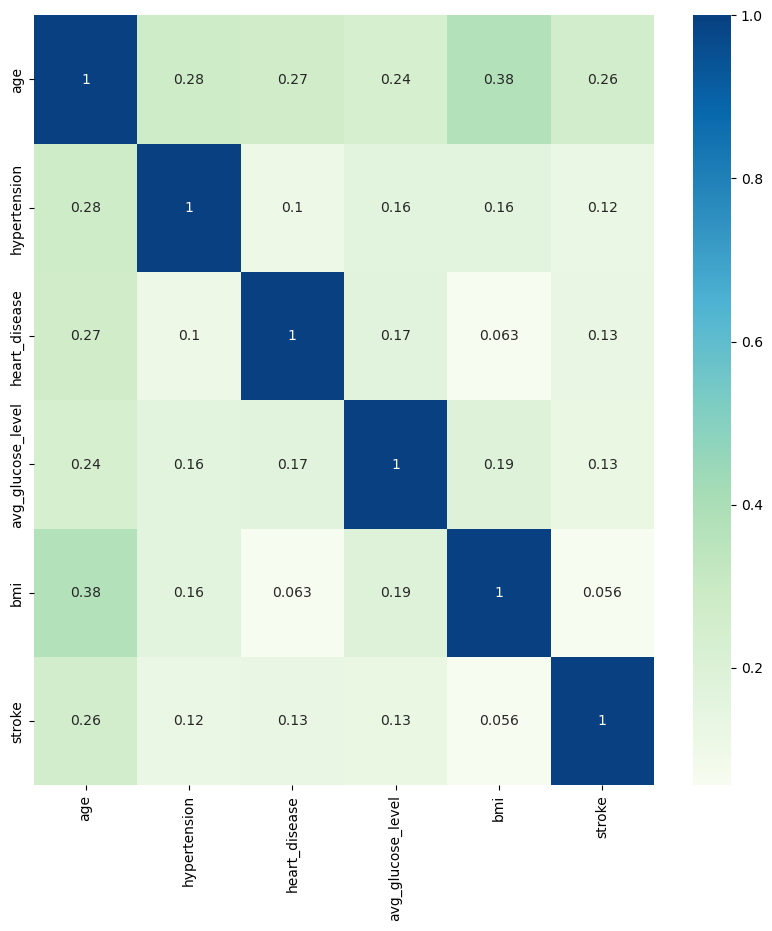

In [138]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

In [139]:
fig = px.histogram(data, x="age", y="bmi", color="stroke",
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()

In [140]:
features = ['gender','work_type','smoking_status','hypertension','heart_disease','ever_married',
           'Residence_type']
for feature in features:
    fig = px.histogram(data, x=feature,color="stroke")
    fig.show()

⭐Important Observations :
* There are total of 11 attributes and 5182 rows in data.
* Data contains no missing value.
* Stroke is the Target Variable.
* Age and BMI have the highest positive correlation.
* Percentage of Males experiencing Stroke is higher than Females.
* People who have had some kind of Heart Disease have higher risk of experiencing a Brain Stroke.
* Percentage of Males experiencing Stroke is higher than Females.
* Married Couples have higher risk of Brain Stroke 🤣🤣🤣🤣🤣.
* Those who live in Urban have a greater risk of Brain Stroke than those who live in Rural areas. Maybe because of hectic lifestyle in Urban Areas.
* Percentage of Males experiencing Stroke is higher than Females.
* If a person has condition of Hypertension then he/she has higher higher chance of getting Brain Stroke.
* Smokers have higher risk of having a Brain Stroke.

In [141]:
brain=data

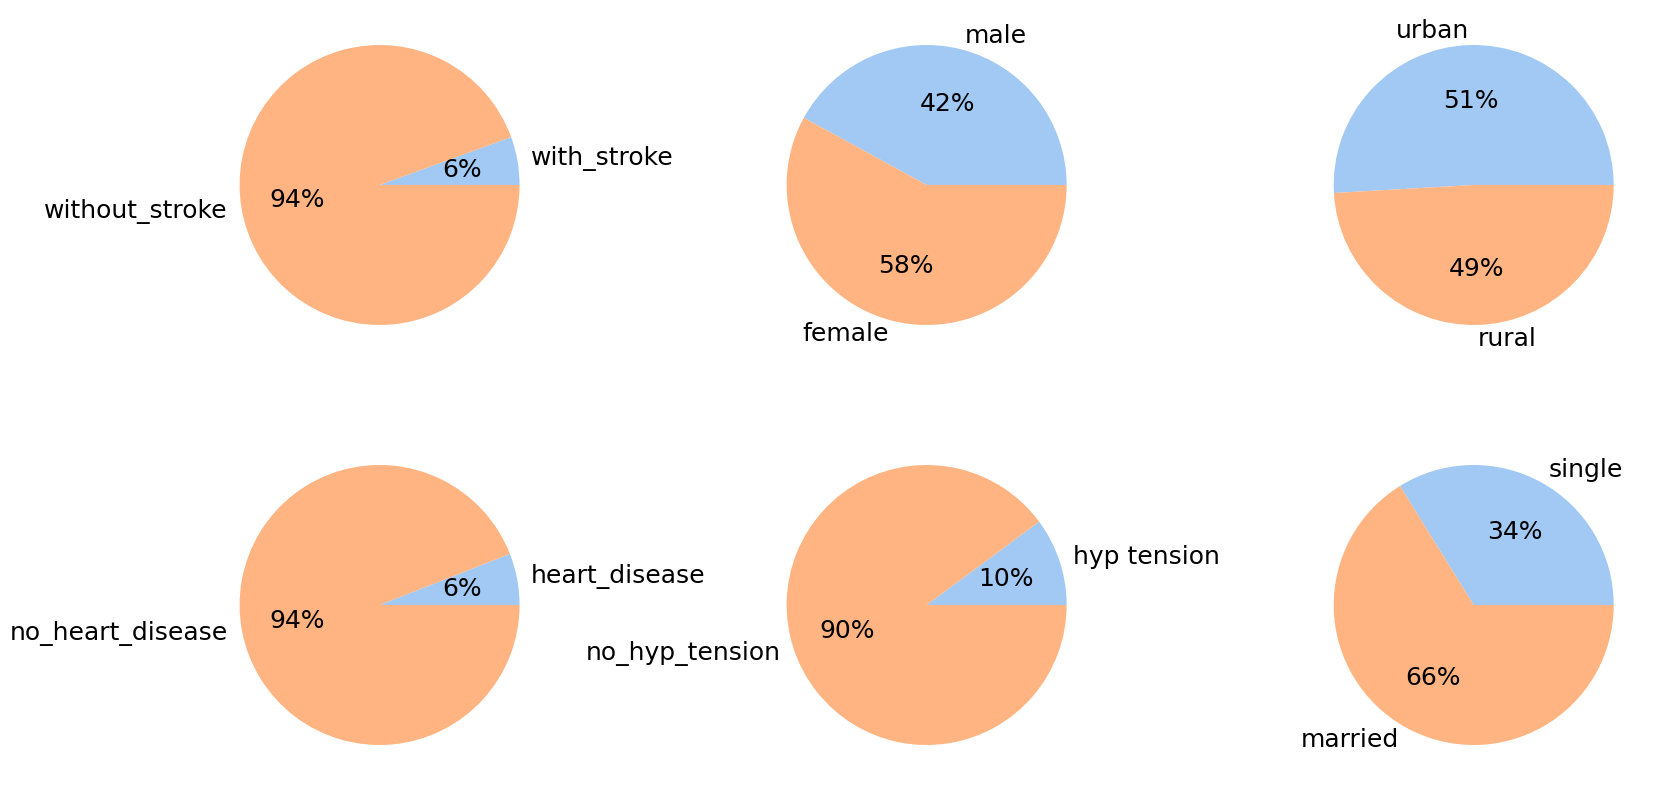

In [142]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
colors = sns.color_palette('pastel')[0:2];

# How much data represents strokes ?
with_stroke         = len(brain.loc[brain.stroke==1]);
without_stroke      = len(brain.loc[brain.stroke==0]);
ax[0,0].pie([with_stroke,without_stroke], labels = ['with_stroke','without_stroke'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18})

# How much data represents male and female ?
male         = len(brain.loc[brain.gender=='Male']);
female      = len(brain.loc[brain.gender=='Female']);
ax[0,1].pie([male,female], labels = ['male','female'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents heart disease ?
heart_yes         = len(brain.loc[brain.heart_disease==1]);
heart_no          = len(brain.loc[brain.heart_disease==0]);
ax[1,0].pie([heart_yes,heart_no], labels = ['heart_disease','no_heart_disease'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents hypertension ?
hyp_yes         = len(brain.loc[brain.hypertension==1]);
hyp_no          = len(brain.loc[brain.hypertension==0]);
ax[1,1].pie([hyp_yes,hyp_no], labels = ['hyp tension','no_hyp_tension'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents resisdency ?
urban         = len(brain.loc[brain.Residence_type=='Urban']);
rural         = len(brain.loc[brain.Residence_type=='Rural']);
ax[0,2].pie([urban,rural], labels = ['urban','rural'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents marital status ?
single         = len(brain.loc[brain.ever_married=='No']);
married        = len(brain.loc[brain.ever_married=='Yes']);
ax[1,2].pie([single,married], labels = ['single','married'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

WE SEE THAT THE DATASET IS HIGHLY IMBALANCED SO WE WOULD NEED TO BALANCE IT

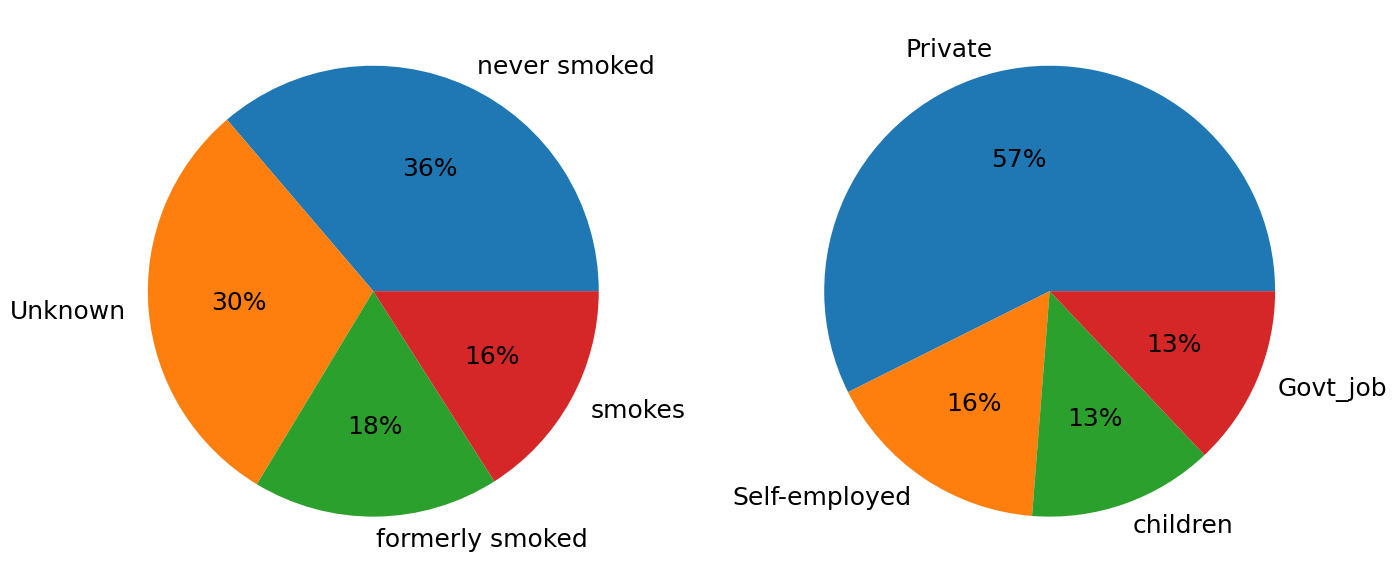

In [143]:
fig, ax = plt.subplots(1,2,figsize=(16,9))

# what about smoking habits?
X = brain.smoking_status.value_counts();
ax[0].pie(X.values, labels = list(X.index), autopct='%.0f%%',textprops={'fontsize': 18});

# what about work_type?
X = brain.work_type.value_counts();
ax[1].pie(X.values, labels = list(X.index), autopct='%.0f%%',textprops={'fontsize': 18});

Smoking and work type have more than two categories.

Text(0.5, 0, 'Age [years]')

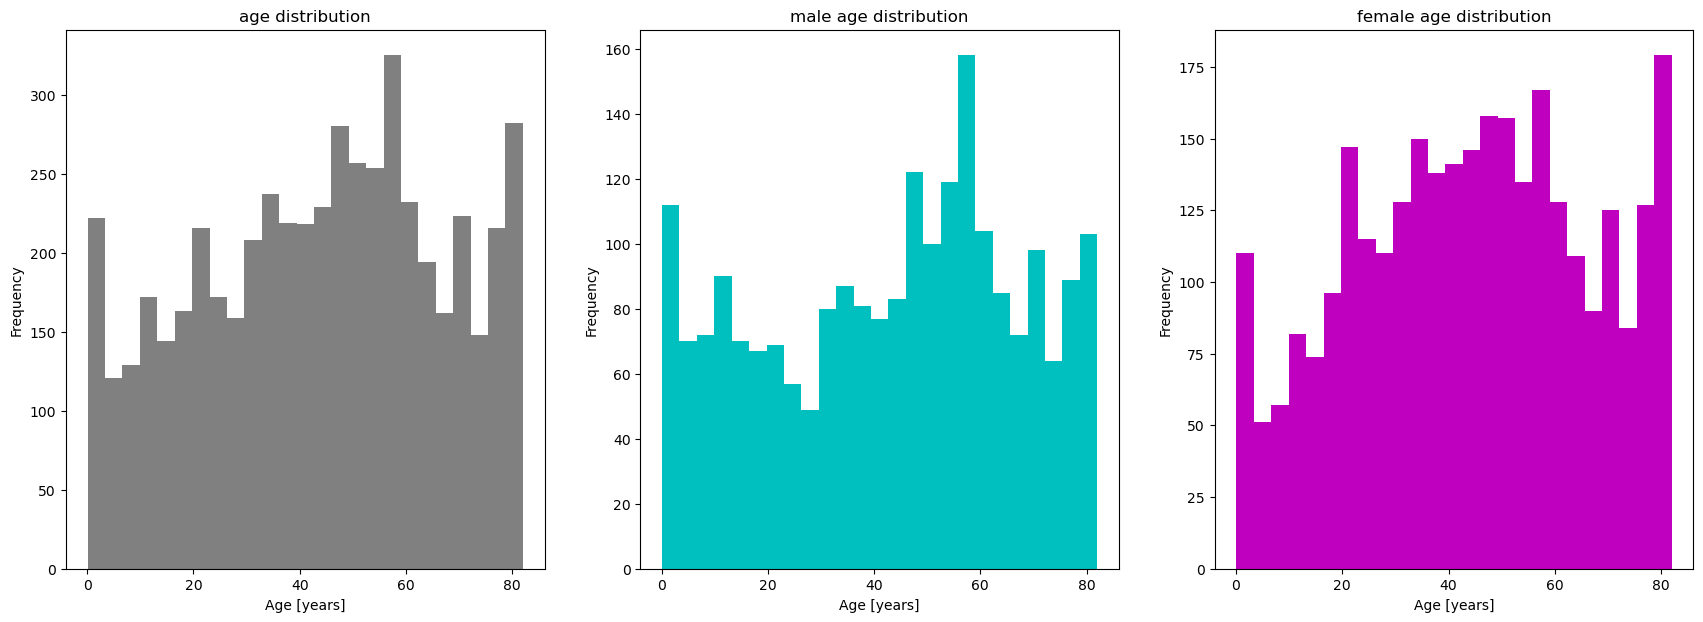

In [144]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(21,7))

brain.age.plot.hist(bins=25,ax=ax1,color='gray')
ax1.set_title('age distribution')
ax1.set_xlabel('Age [years]')

# male age
brain[brain["gender"]=='Male'].age.plot.hist(bins=25,ax=ax2,color='c')
ax2.set_title('male age distribution')
ax2.set_xlabel('Age [years]')

# female age
brain[brain["gender"]=='Female'].age.plot.hist(bins=25,ax=ax3,color='m')
ax3.set_title('female age distribution')
ax3.set_xlabel('Age [years]')

Text(0.5, 0, 'Age [years]')

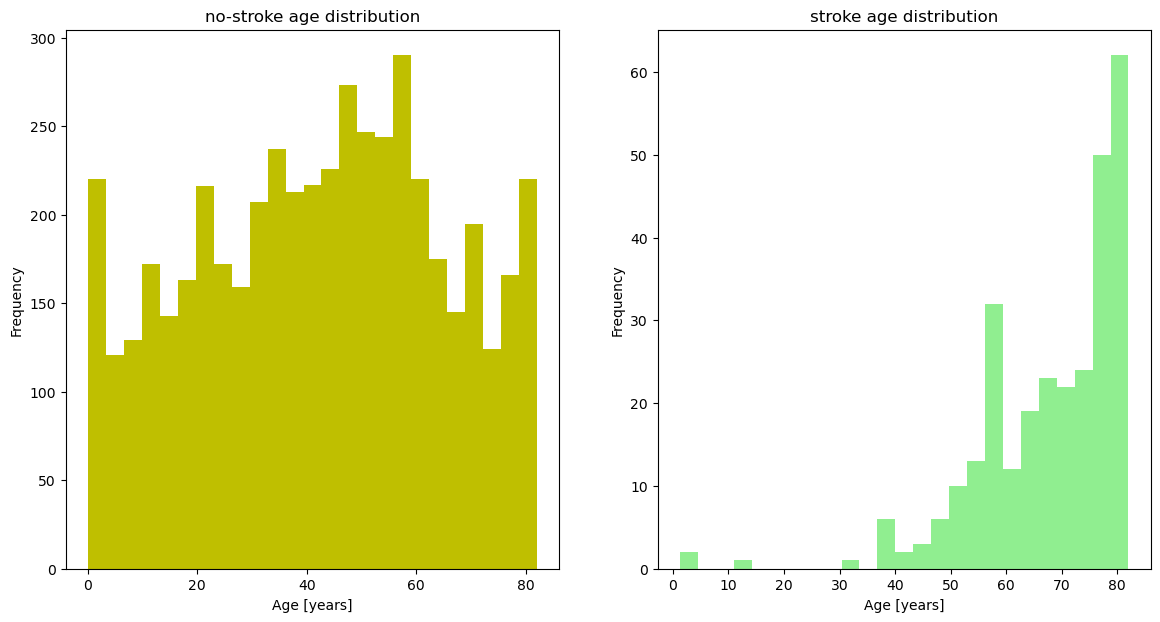

In [145]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["stroke"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-stroke age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["stroke"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('stroke age distribution')
ax2.set_xlabel('Age [years]')

Text(0.5, 0, 'Age [years]')

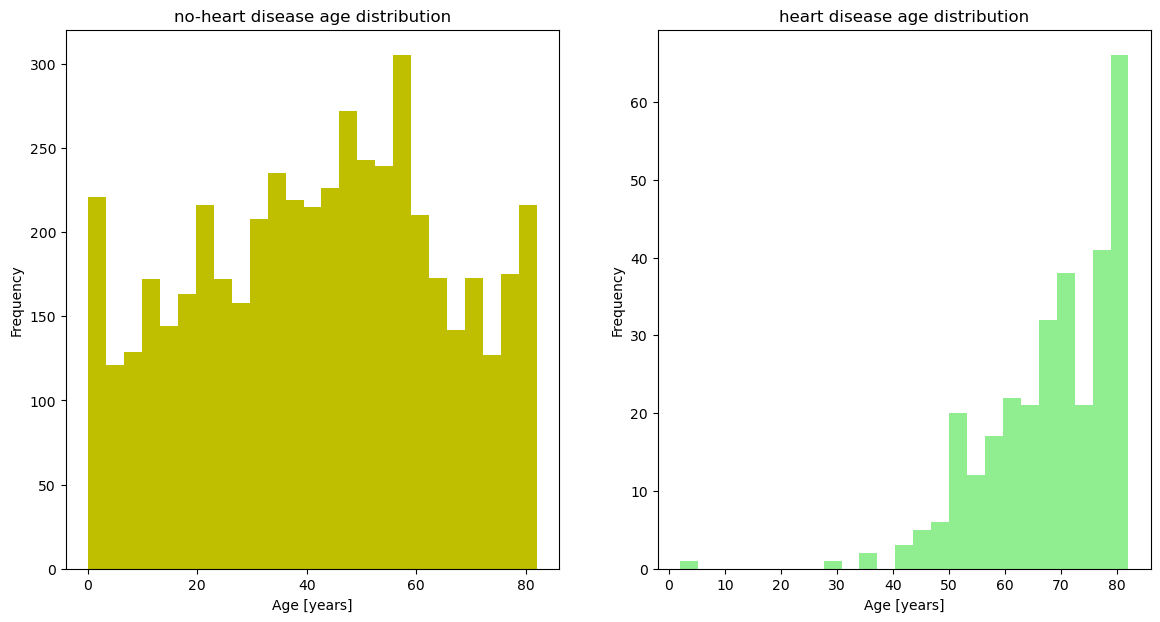

In [146]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["heart_disease"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-heart disease age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["heart_disease"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('heart disease age distribution')
ax2.set_xlabel('Age [years]')

Text(0.5, 0, 'Age [years]')

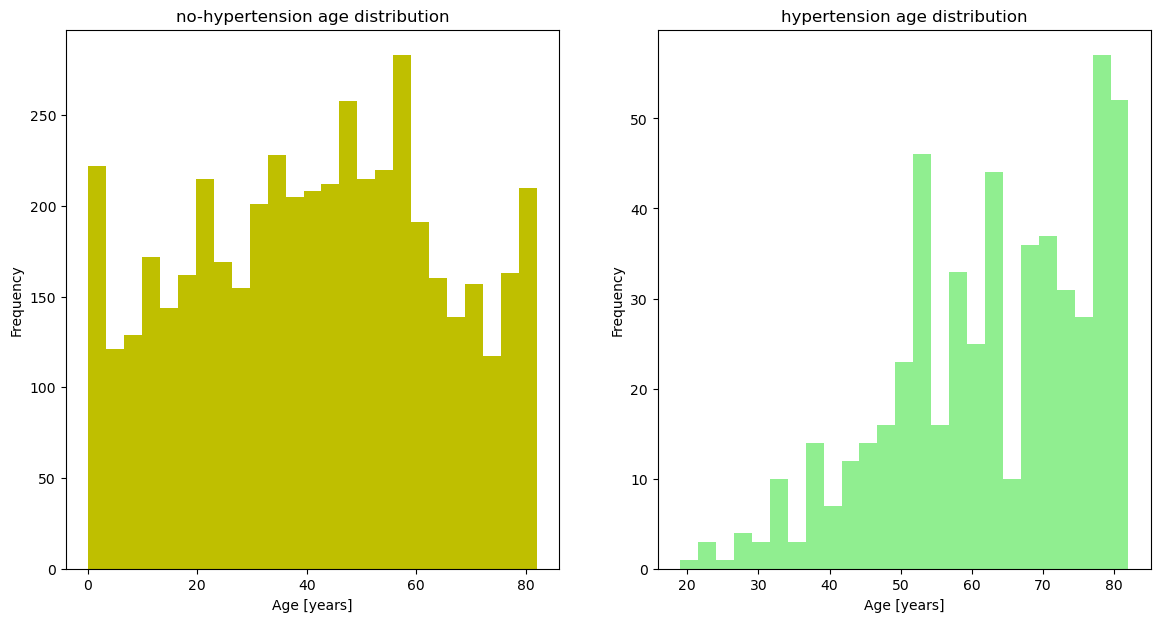

In [147]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["hypertension"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-hypertension age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["hypertension"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('hypertension age distribution')
ax2.set_xlabel('Age [years]')

Text(0.5, 0, 'bmi [kg/m2]')

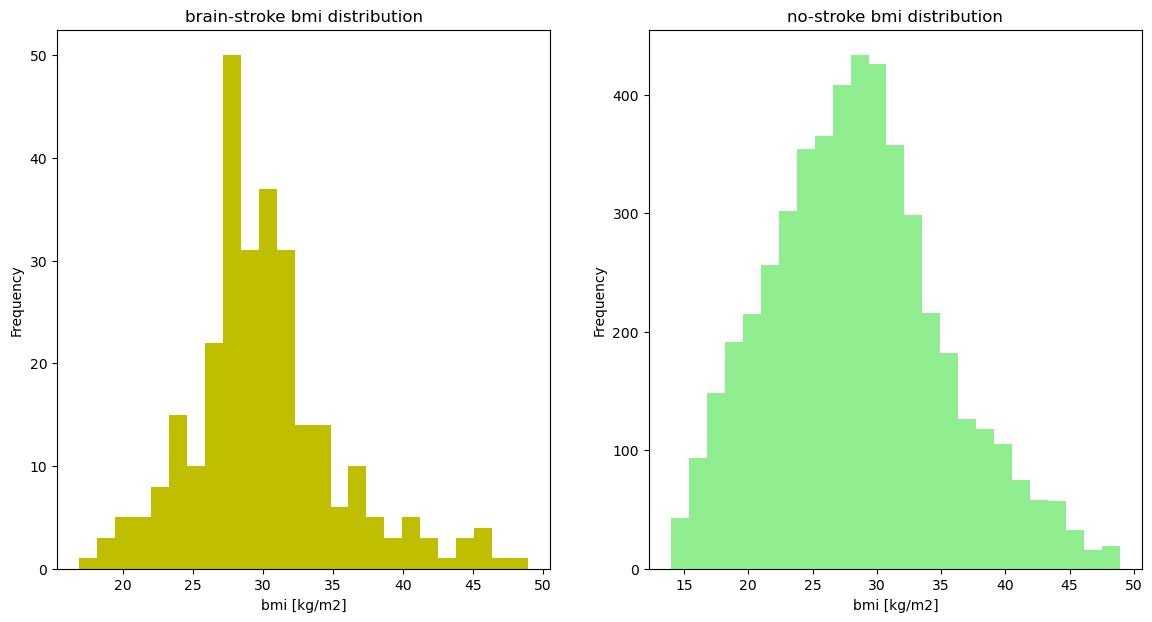

In [148]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke bmi
brain[brain["stroke"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('brain-stroke bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# stroke bmi
brain[brain["stroke"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-stroke bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

Text(0.5, 0, 'bmi [kg/m2]')

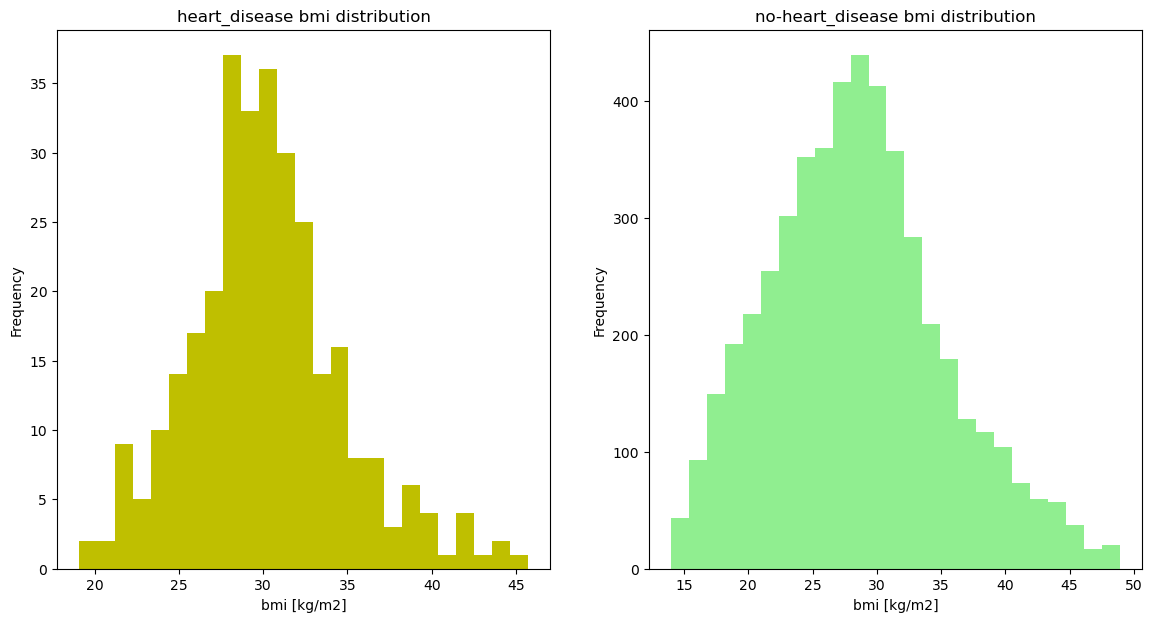

In [149]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# heart_disease bmi
brain[brain["heart_disease"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('heart_disease bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# heart_disease bmi
brain[brain["heart_disease"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-heart_disease bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

Text(0.5, 0, 'bmi [kg/m2]')

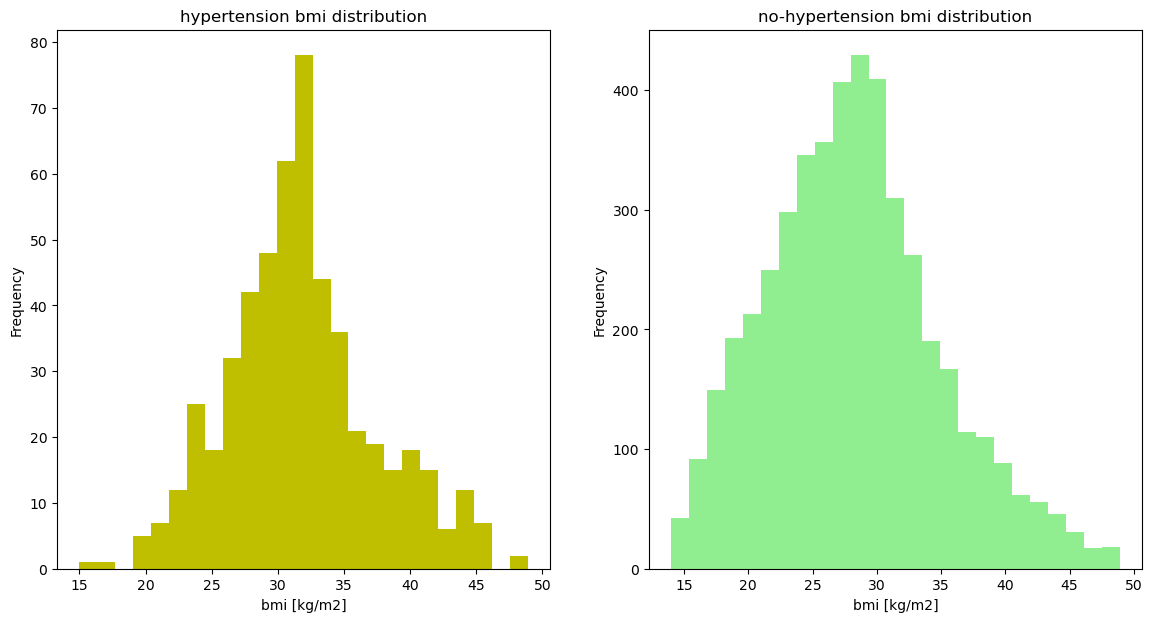

In [150]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# hypertension bmi
brain[brain["hypertension"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('hypertension bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# hypertension bmi
brain[brain["hypertension"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-hypertension bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

There is not much difference in bmi distribution as far as stroke or heart disease is concerned.
The peak of people with hypertension tends to be rightside of 30 as compared to people without hypertension.
Hence more bmi means on average more hypertension. Better we focus on exercises.
But since it is imbalanced data, we could not infer anything for sure.

Text(0.5, 0, 'avg_glucose_level [mg/dL]')

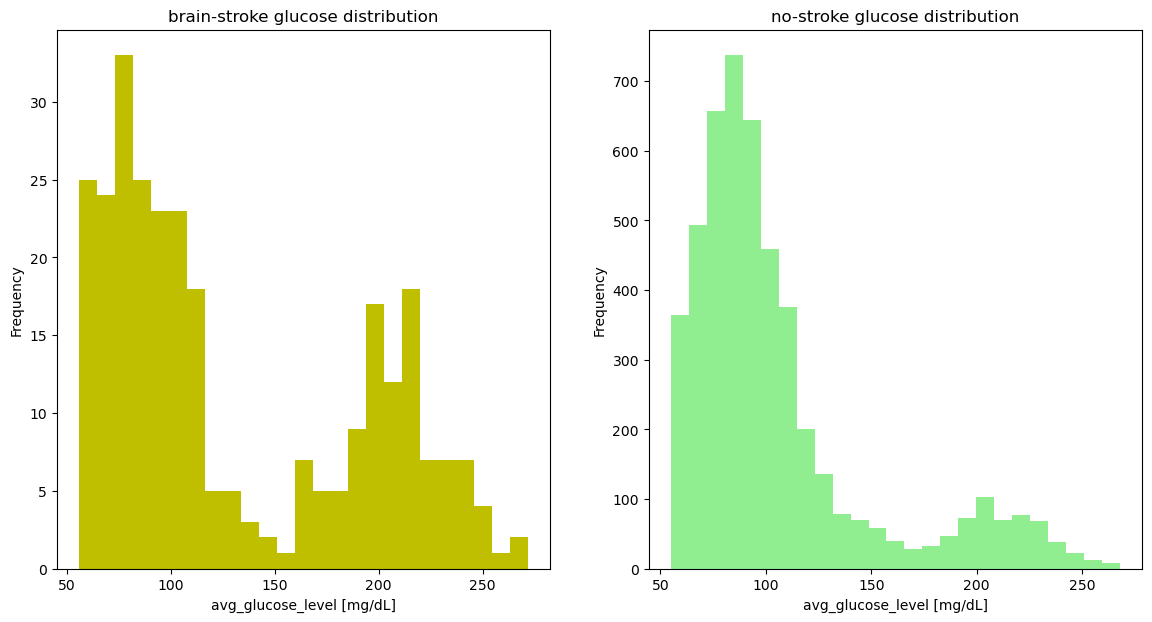

In [151]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke avg_glucose_level
brain[brain["stroke"]==1].avg_glucose_level.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('brain-stroke glucose distribution')
ax1.set_xlabel('avg_glucose_level [mg/dL]')

# stroke avg_glucose_level
brain[brain["stroke"]==0].avg_glucose_level.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-stroke glucose distribution')
ax2.set_xlabel('avg_glucose_level [mg/dL]')

In [152]:
df=data

<AxesSubplot:xlabel='stroke', ylabel='count'>

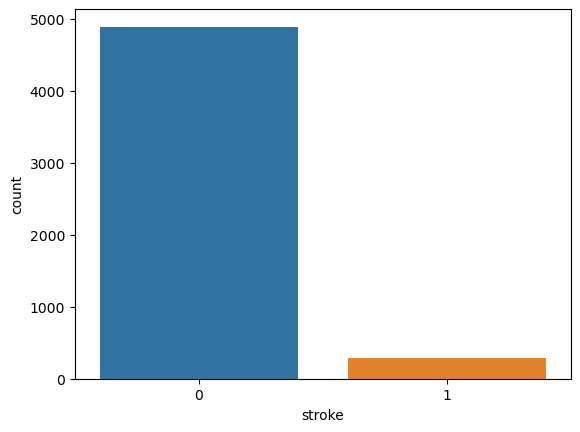

In [153]:
sns.countplot(x='stroke', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

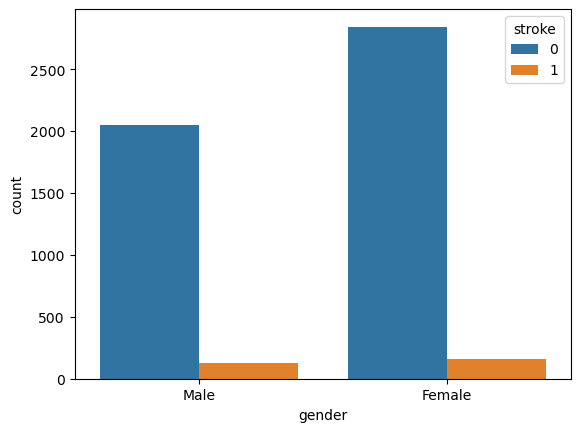

In [154]:
sns.countplot(x='gender', data=df, hue='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

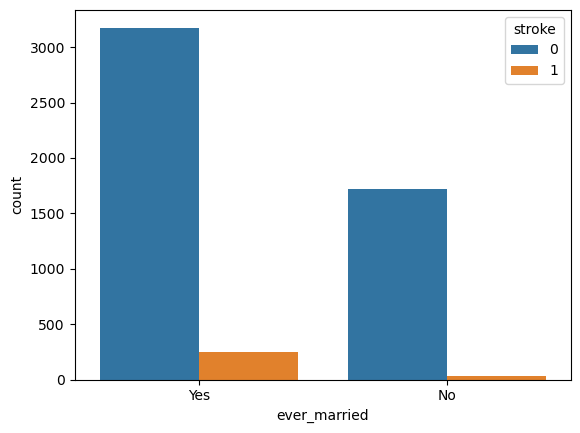

In [155]:
sns.countplot(x='ever_married', data=df, hue='stroke')

In [156]:
df['work_type'].value_counts()

Private          2974
Self-employed     848
children          689
Govt_job          671
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

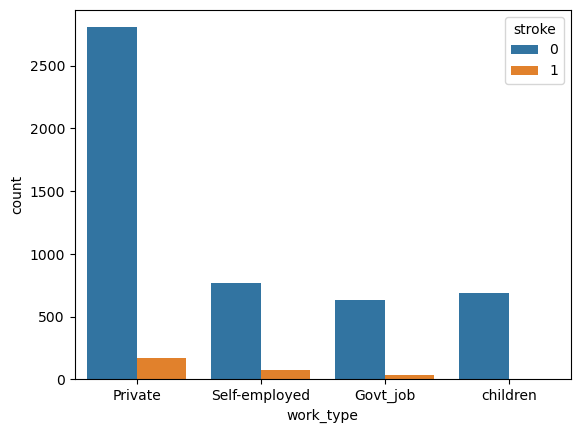

In [157]:
sns.countplot(x='work_type', data=df, hue='stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

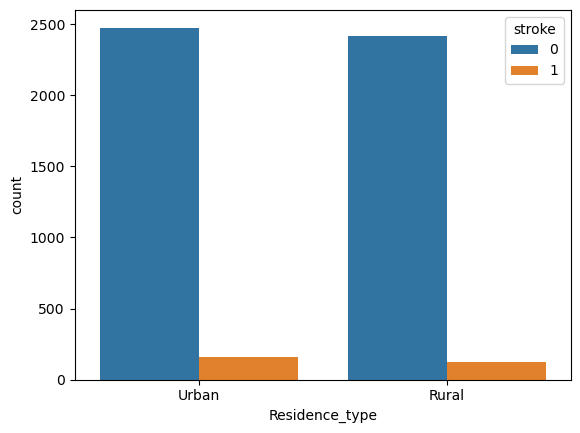

In [158]:
sns.countplot(x='Residence_type', data=df, hue='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

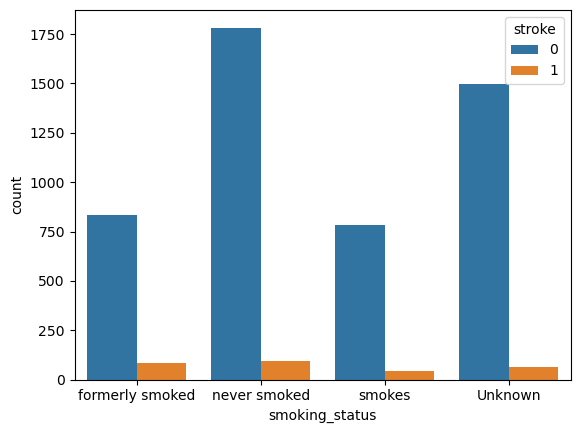

In [159]:
sns.countplot(x='smoking_status', data=df, hue='stroke')

<AxesSubplot:>

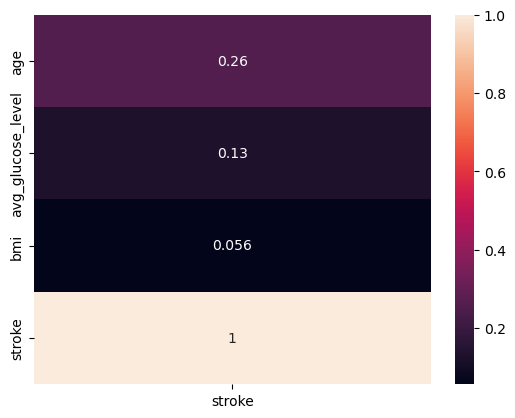

In [160]:
sns.heatmap(df.drop(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status'], axis=1).corr()[['stroke']], annot=True)


BALANCING THE DATASET

In [161]:
all_data = data

In [162]:
target = 'stroke'
X = all_data.loc[:,all_data.columns!=target]
y = all_data.loc[:,all_data.columns==target]

In [163]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

0    4894
1     288
Name: stroke, dtype: int64


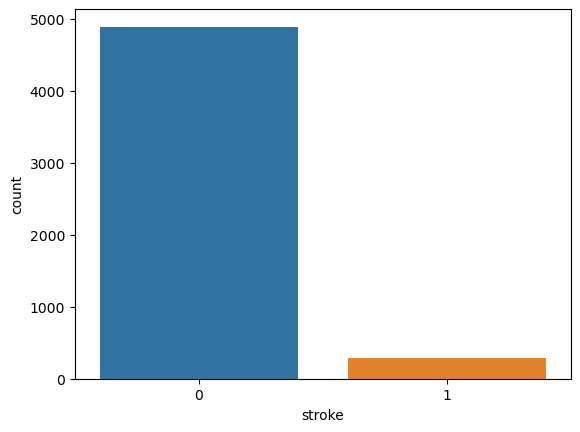

In [164]:
ax = sns.countplot(x=target,data=all_data)
print(all_data[target].value_counts())

There is an oversampling in the dataset. There is a big difference between those who do not have a stroke and those who do

In [165]:
percentage_no_stroke = 100*(4733/float(all_data.shape[0]))
percentage_no_stroke

91.33539174064069

In [166]:
percentage_yes_stroke = 100*(248/float(all_data.shape[0]))
percentage_yes_stroke

4.785796989579313

In [167]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)

0    4894
1     288
Name: stroke, dtype: int64


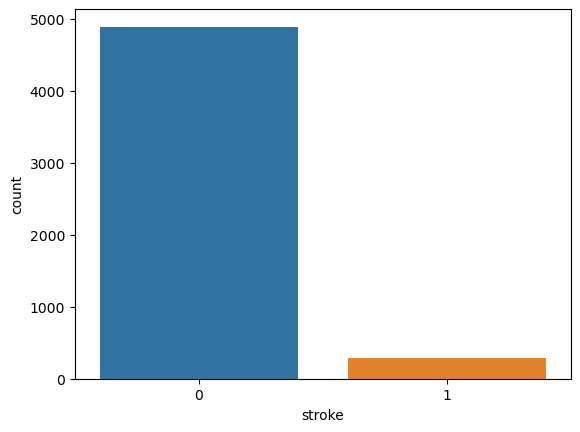

In [168]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

Now we have a balanced dataset

In [169]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from tabulate import tabulate
# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    RidgeClassifier(),
    SVC(),
    LinearSVC(),
    NuSVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    BernoulliNB(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    MLPClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]
results=[]
# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append([classifier.__class__.__name__, accuracy, precision, recall])
headers = ["Classifier", "Accuracy", "Precision", "Recall"]
print(tabulate(results, headers=headers, floatfmt=".3f", tablefmt="grid"))


+-------------------------------+------------+-------------+----------+
| Classifier                    |   Accuracy |   Precision |   Recall |
+===============================+============+=============+==========+
| RandomForestClassifier        |      0.890 |       0.947 |    0.841 |
+-------------------------------+------------+-------------+----------+
| AdaBoostClassifier            |      0.870 |       0.909 |    0.841 |
+-------------------------------+------------+-------------+----------+
| LogisticRegression            |      0.855 |       0.915 |    0.804 |
+-------------------------------+------------+-------------+----------+
| SGDClassifier                 |      0.825 |       0.840 |    0.832 |
+-------------------------------+------------+-------------+----------+
| RidgeClassifier               |      0.855 |       0.924 |    0.794 |
+-------------------------------+------------+-------------+----------+
| SVC                           |      0.845 |       0.896 |    

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1,y1, test_size=0.20, shuffle=True)

In [171]:
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, Y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(X_train, Y_train)
 return rndforest


In [172]:
#random_forest_en = rf(X_train,Y_train.values.ravel(), n_estimators=250)
random_forest_en = rf(X_train,Y_train.values.ravel(), n_estimators=250)

In [173]:
print("TRAINING ACCURACY:", random_forest_en.score(X_train, Y_train))
print("VALIDATION ACCURACY", random_forest_en.score(X_test, Y_test))

TRAINING ACCURACY: 1.0
VALIDATION ACCURACY 0.9729315628192032


In [174]:
from matplotlib import pyplot as plt

In [175]:
import itertools
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(X)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=1)
    plt.figure(figsize=(18, 16))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('CLASS')
    plt.xlabel('PREDICTED CLASS')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

TRAIN CONFUSION MATRIX

CONFUSION MATRIX


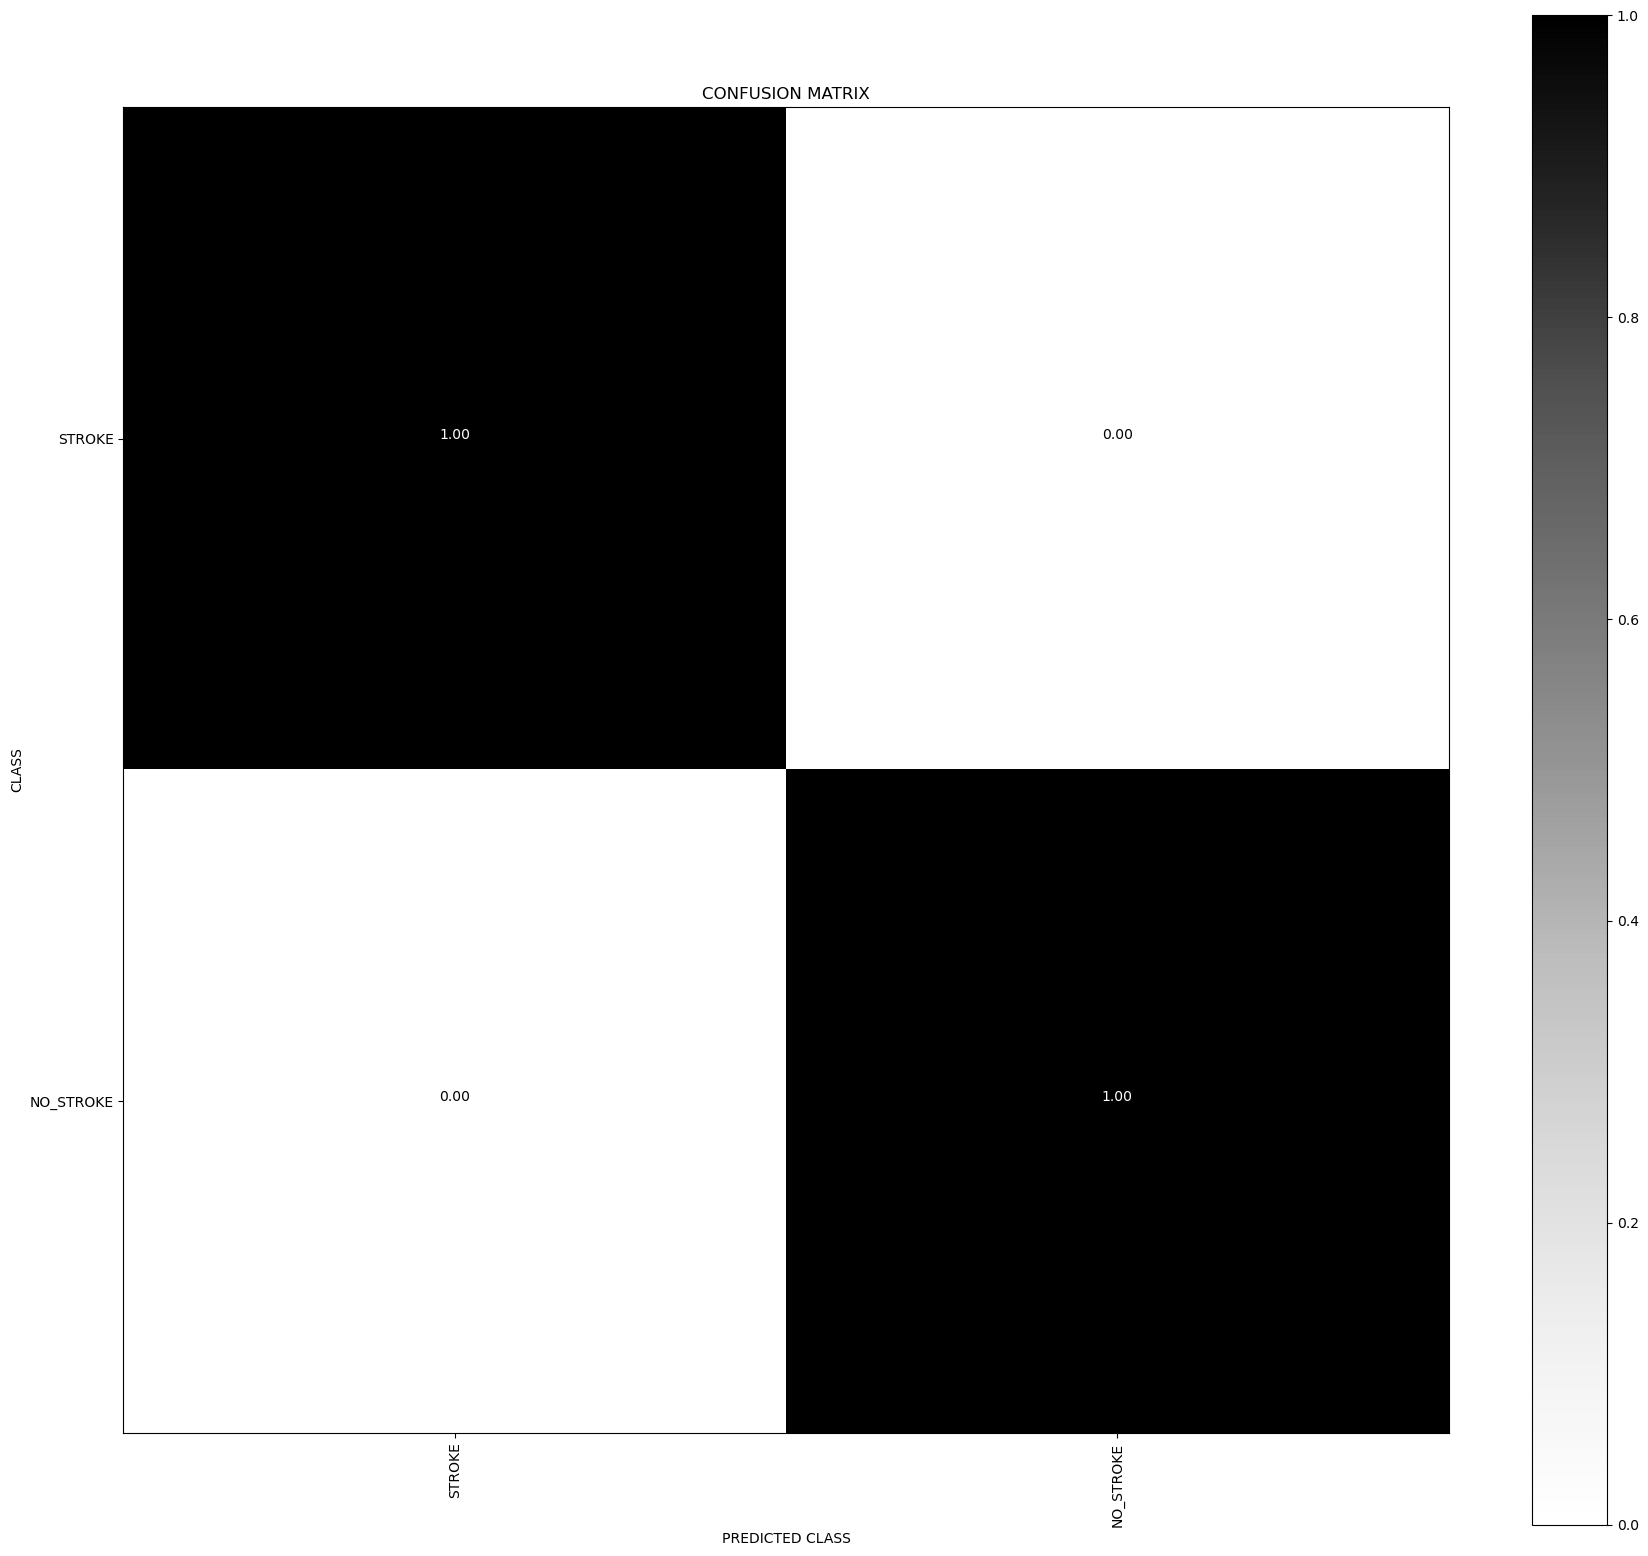

In [176]:
from sklearn.metrics import confusion_matrix

LABELS = ['STROKE', 'NO_STROKE']
plot_confusion_matrix(random_forest_en, X_train, Y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

TEST CONFUSION MATRIX

CONFUSION MATRIX


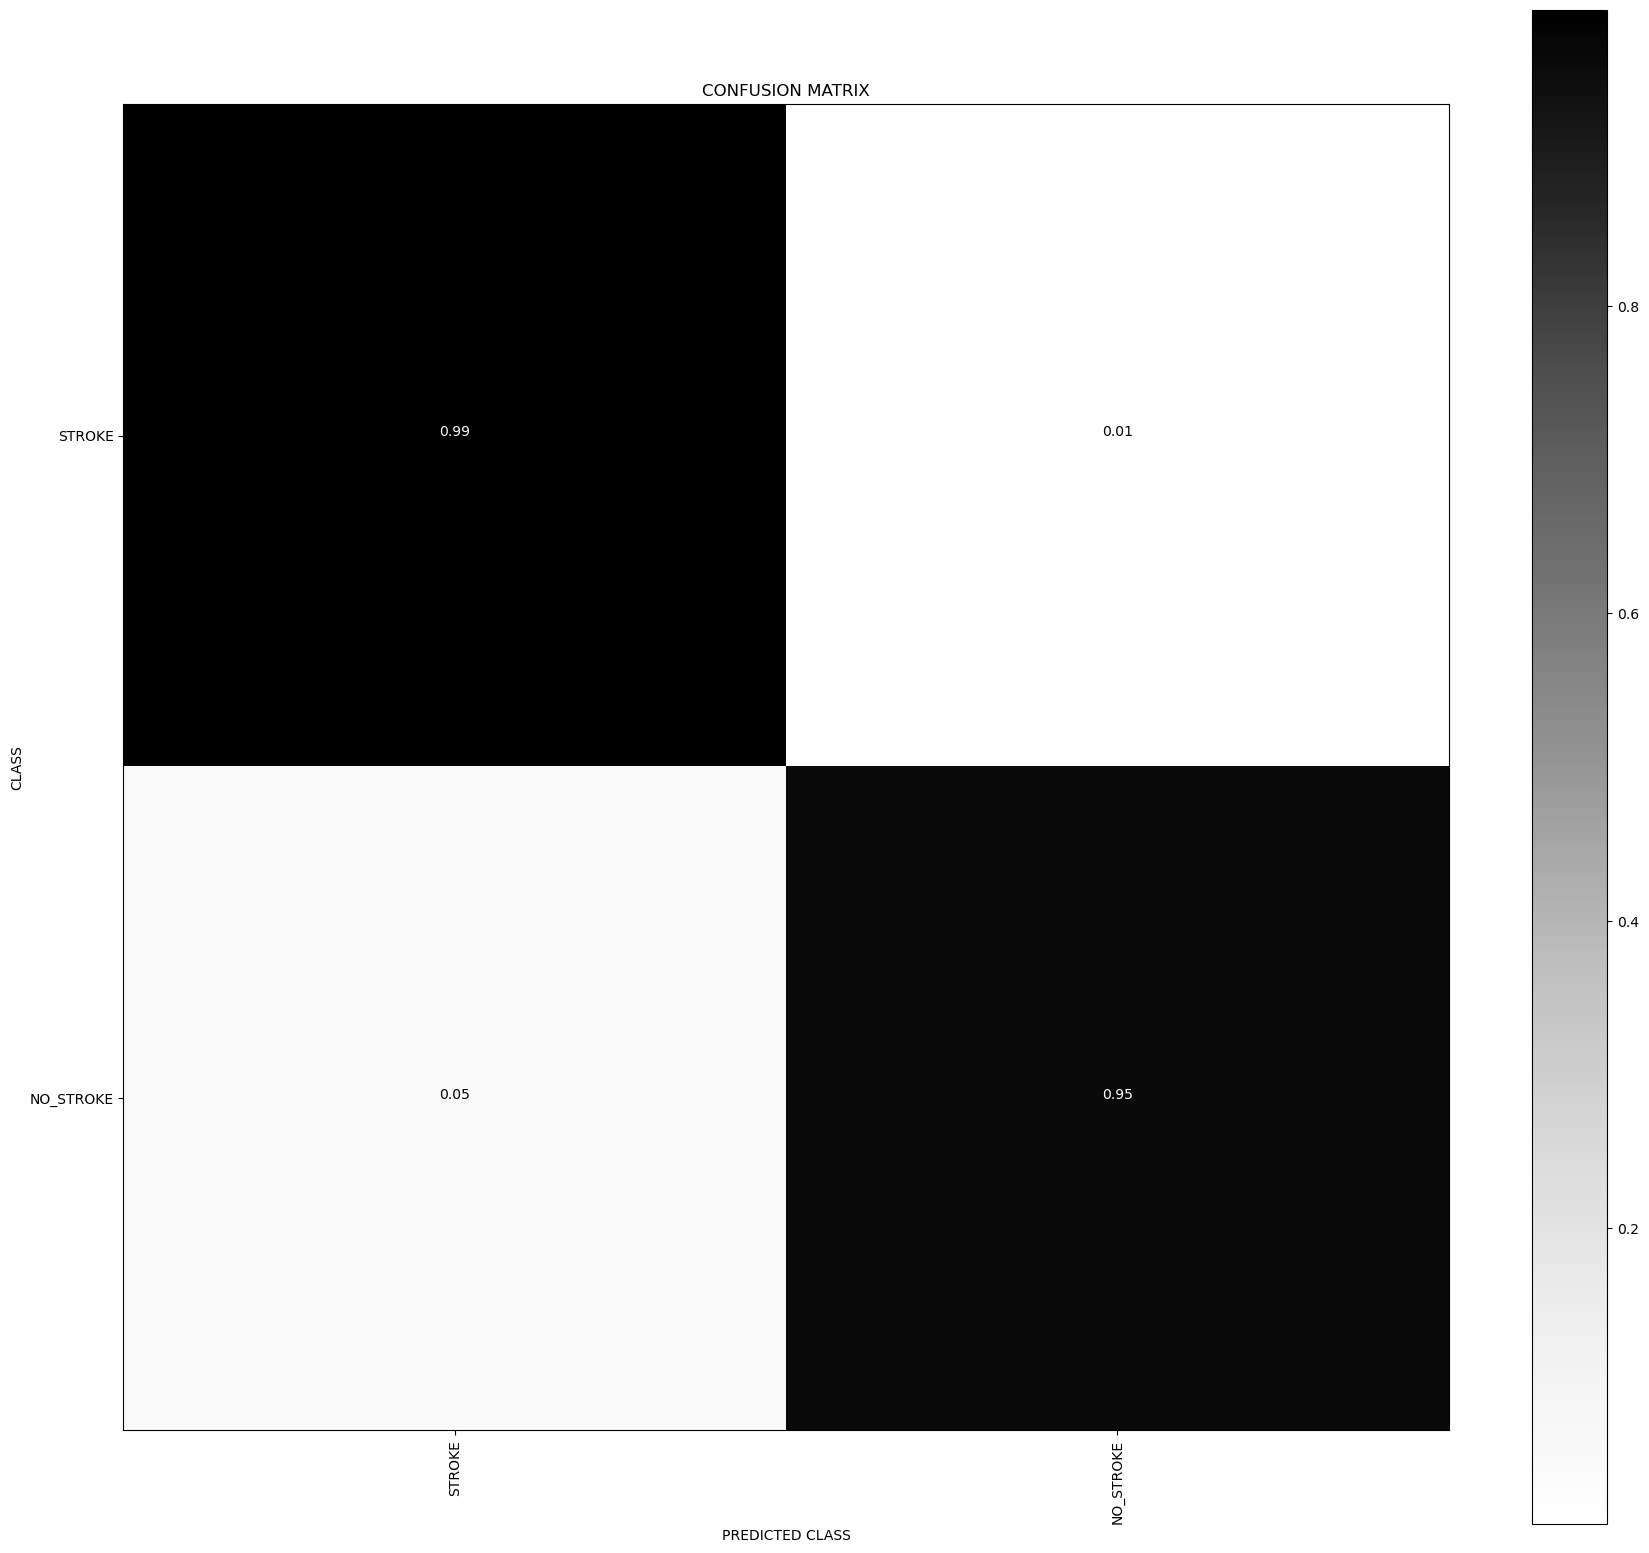

In [177]:
plot_confusion_matrix(random_forest_en, X_test, Y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

In [178]:
import pickle
filename = "brain_stroke.pkl"
with open(filename, "wb") as file:
    pickle.dump(random_forest_en, file)